In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
dataset = pd.read_csv('../icecream.csv')
dataset.head(3)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


In [8]:
dataset.isnull().sum()

temp    0
unit    0
dtype: int64

In [7]:
dataset.columns = ['temp', 'unit']


In [9]:
dataset.head(3)

,temp,unit
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


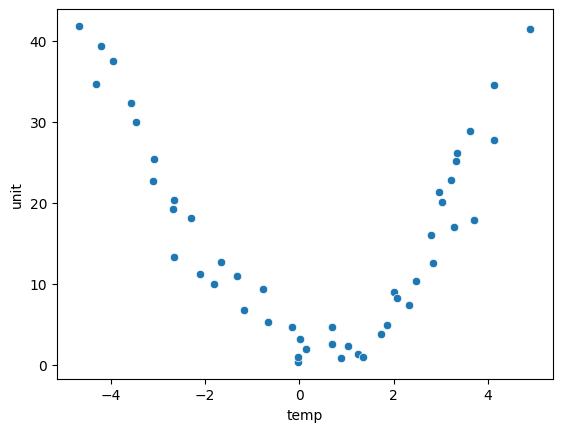

In [10]:
sns.scatterplot(x='temp', y='unit', data=dataset)
plt.show()

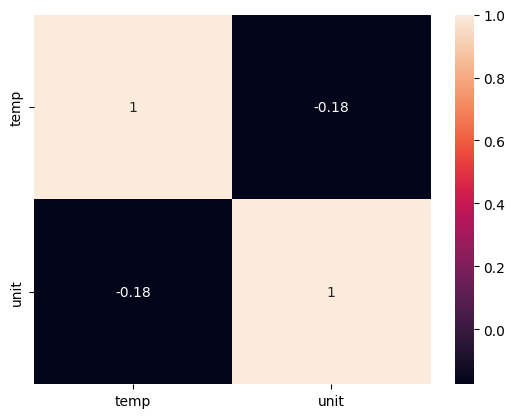

In [12]:
sns.heatmap(data=dataset[['temp', 'unit']].corr(), annot=True)
plt.show()

In [13]:
x = dataset[['temp']]
y = dataset['unit']

In [15]:
pf = PolynomialFeatures()
pf.fit(x) 
x = pf.transform(x)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
lr.score(x_test, y_test) * 100

84.3055137193884

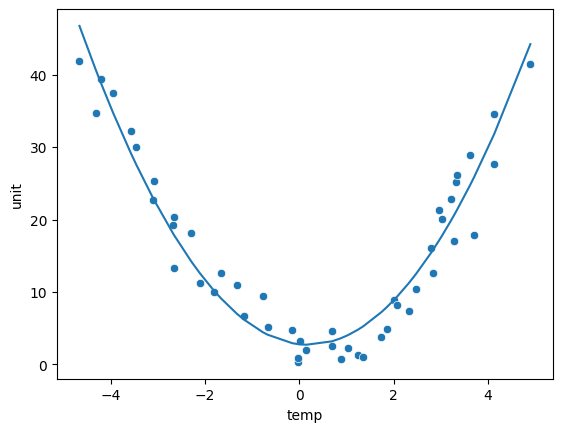

In [20]:
sns.scatterplot(x='temp', y='unit', data=dataset)
sns.lineplot(x='temp', y=lr.predict(x), data=dataset)
plt.show()

In [21]:
lr.coef_

array([ 0.        , -0.70641926,  1.87145125])

In [22]:
lr.intercept_

np.float64(2.7683058295738583)